<a href="https://colab.research.google.com/github/nagasai17/Abhaya/blob/master/ultimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_excel('/content/Merged_2.xlsx')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
data


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,NAME,Age,Highest Degree,English,Coding,Art,Accounting ability,known service based abilities,negotiations,Design and planning,Sector
0,naga,20,MBBS,YES,NO,YES,NO,YES,NO,NO,Health
1,hari,22,BTECH,YES,YES,NO,NO,YES,NO,NO,IT
2,teja,23,MBBS,YES,NO,NO,NO,YES,NO,NO,Health
3,ravi,21,12th,YES,NO,YES,NO,YES,NO,NO,ARTS
4,hrithik,20,11th,NO,NO,YES,NO,NO,NO,NO,ARTS
...,...,...,...,...,...,...,...,...,...,...,...
444,Ahmed,21,BTECH,YES,YES,NO,NO,NO,NO,YES,IT
445,Sayed,28,BTECH,YES,NO,NO,YES,NO,NO,NO,FINANCE
446,Karna reedy,25,BTECH,YES,YES,NO,NO,YES,NO,NO,IT
447,Zaid,32,MBBS,NO,NO,NO,NO,NO,NO,NO,Health


Encoding means coverting all categorical to Numerical

In [2]:

# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(10)



,NAME,Highest Degree,English,Coding,Art,Accounting ability,known service based abilities,negotiations,Design and planning,Sector
0,299,6,1,0,1,0,1,0,0,3
1,242,5,1,1,0,0,1,0,0,4
2,395,6,1,0,0,0,1,0,0,3
3,348,2,1,0,1,0,1,0,0,0
4,249,1,0,0,1,0,0,0,0,0
5,214,6,1,0,1,0,1,0,0,3
6,331,5,1,0,0,0,1,1,1,5
7,288,5,1,0,0,1,1,0,0,2
8,373,6,1,0,0,0,0,0,0,3
9,323,5,0,0,0,0,0,1,1,5


One hot encoder


In [3]:
X = data[data.columns[2:-1]] 
y = data[data.columns[-1]] 
print(X)
print(y)

     Highest Degree  English   ...  negotiations  Design and planning
0                 6         1  ...             0                    0
1                 5         1  ...             0                    0
2                 6         1  ...             0                    0
3                 2         1  ...             0                    0
4                 1         0  ...             0                    0
..              ...       ...  ...           ...                  ...
444               5         1  ...             0                    1
445               5         1  ...             0                    0
446               5         1  ...             0                    0
447               6         0  ...             0                    0
448               5         0  ...             1                    1

[449 rows x 8 columns]
0      3
1      4
2      3
3      0
4      0
      ..
444    4
445    2
446    4
447    3
448    5
Name: Sector, Length: 449, dtype: int

splitting our data set


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y

(224, 8)
(225, 8)
(224,)
(225,)


0      3
1      4
2      3
3      0
4      0
      ..
444    4
445    2
446    4
447    3
448    5
Name: Sector, Length: 449, dtype: int64

Encoding



,Highest Degree,English,Coding,Art,Accounting ability,known service based abilities,negotiations,Design and planning
0,4,1,0,1,0,1,0,0
1,3,1,1,0,0,1,0,0
2,4,1,0,0,0,1,0,0
3,2,1,0,1,0,1,0,0
4,1,0,0,1,0,0,0,0
5,4,1,0,1,0,1,0,0
6,3,1,0,0,0,1,1,1
7,3,1,0,0,1,1,0,0
8,4,1,0,0,0,0,0,0
9,3,0,0,0,0,0,1,1


Desicion Tree classifier


In [22]:




clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

*accuracy* for Decision Tree Classifier 

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precison:",metrics.precision_score(y_test,  y_pred,average='weighted') )
print("recall:",metrics.recall_score(y_test,  y_pred,average='weighted') )
print("F1Score:",metrics.f1_score(y_test,  y_pred,average='weighted') )

Accuracy: 0.9822222222222222
Precison: 0.9826558265582656
recall: 0.9822222222222222
F1Score: 0.9821687242798354


Multinomial Naive Baiyes

In [24]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_predwithnaive = gnb.predict(X_test)
y_predwithnaive

array([1, 3, 2, 4, 1, 1, 3, 0, 0, 0, 5, 0, 2, 4, 4, 2, 4, 1, 0, 0, 5, 3,
       2, 0, 2, 4, 3, 0, 4, 5, 0, 5, 0, 3, 0, 2, 1, 4, 1, 5, 1, 4, 2, 3,
       4, 0, 0, 2, 5, 5, 2, 2, 0, 0, 3, 5, 4, 5, 5, 4, 2, 4, 2, 1, 1, 3,
       0, 5, 0, 0, 1, 5, 0, 3, 0, 3, 2, 0, 5, 0, 0, 3, 4, 0, 0, 1, 3, 0,
       5, 1, 4, 3, 3, 5, 0, 3, 1, 5, 3, 5, 0, 5, 5, 0, 3, 5, 3, 5, 5, 0,
       0, 0, 0, 4, 0, 0, 1, 3, 3, 0, 2, 4, 0, 5, 0, 2, 1, 4, 4, 2, 5, 0,
       3, 0, 1, 3, 3, 1, 4, 4, 1, 3, 5, 0, 0, 4, 0, 1, 3, 3, 3, 0, 2, 1,
       5, 3, 3, 2, 5, 3, 3, 3, 5, 5, 4, 5, 0, 0, 1, 0, 5, 0, 0, 0, 4, 0,
       5, 4, 4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 2, 0, 1, 1, 5, 2, 0,
       3, 4, 4, 2, 1, 0, 3, 1, 3, 0, 3, 0, 0, 1, 0, 1, 1, 0, 5, 5, 5, 3,
       1, 3, 1, 3, 0])

accuracy for naive bayes



In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predwithnaive))
y_predwithnaive

print("Precison:",metrics.precision_score(y_test, y_predwithnaive,average='weighted') )
print("recall:",metrics.recall_score(y_test, y_predwithnaive,average='weighted') )
print("F1Score:",metrics.f1_score(y_test, y_predwithnaive,average='weighted') )


Accuracy: 0.8088888888888889
Precison: 0.8264911297852475
recall: 0.8088888888888889
F1Score: 0.7970890188434049


Knn classifier

array([3, 2, 2, 4, 1, 1, 3, 2, 0, 0, 5, 3, 2, 4, 4, 2, 4, 1, 3, 0, 5, 2,
       4, 3, 2, 4, 3, 3, 4, 5, 0, 5, 0, 3, 3, 2, 1, 4, 1, 5, 3, 4, 2, 3,
       4, 0, 0, 2, 5, 5, 3, 2, 0, 0, 2, 5, 4, 5, 5, 4, 2, 4, 2, 1, 1, 3,
       3, 5, 2, 3, 1, 5, 2, 2, 2, 2, 2, 3, 5, 2, 3, 2, 4, 0, 3, 1, 3, 0,
       5, 1, 4, 2, 3, 5, 0, 3, 1, 5, 3, 5, 0, 5, 5, 0, 3, 5, 2, 5, 5, 0,
       0, 3, 0, 4, 0, 0, 1, 2, 3, 0, 2, 4, 0, 5, 2, 2, 3, 4, 4, 2, 5, 0,
       3, 0, 1, 3, 3, 1, 4, 4, 1, 3, 5, 2, 3, 4, 0, 3, 2, 2, 3, 0, 2, 1,
       5, 2, 2, 2, 5, 3, 3, 3, 5, 5, 4, 5, 0, 0, 1, 0, 5, 0, 0, 2, 4, 0,
       5, 4, 4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 0, 3, 3, 2, 0, 1, 3, 5, 2, 2,
       2, 4, 4, 2, 1, 3, 3, 1, 2, 0, 3, 0, 3, 3, 0, 1, 1, 3, 5, 5, 5, 3,
       1, 2, 1, 3, 2])

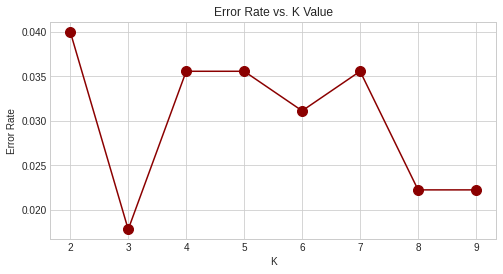

In [26]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

error_rate = []
for i in range(2,10):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(8,4))
plt.plot(range(2,10),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Create KNN Classifier
knn1 = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn1.fit(X_train, y_train)

#Predict the response for test dataset
y_predwithknn = knn1.predict(X_test)
y_predwithknn

Creating best KNN value classifier

In [27]:
# Create KNN Classifier
knn1 = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn1.fit(X_train, y_train)

#Predict the response for test dataset
y_predwithknn = knn1.predict(X_test)
y_predwithknn

array([3, 2, 2, 4, 1, 1, 3, 2, 0, 0, 5, 3, 2, 4, 4, 2, 4, 1, 3, 0, 5, 2,
       4, 3, 2, 4, 3, 3, 4, 5, 0, 5, 0, 3, 3, 2, 1, 4, 1, 5, 3, 4, 2, 3,
       4, 0, 0, 2, 5, 5, 3, 2, 0, 0, 2, 5, 4, 5, 4, 4, 2, 4, 2, 1, 1, 3,
       3, 4, 2, 3, 1, 5, 0, 2, 2, 2, 2, 3, 5, 0, 3, 2, 4, 0, 3, 1, 3, 0,
       5, 1, 4, 2, 3, 5, 0, 3, 1, 5, 3, 5, 0, 5, 5, 0, 3, 5, 2, 5, 5, 0,
       0, 3, 0, 4, 0, 0, 1, 2, 3, 0, 2, 4, 0, 5, 2, 2, 3, 4, 4, 2, 5, 0,
       3, 0, 1, 3, 3, 1, 4, 4, 1, 3, 5, 0, 3, 4, 0, 3, 2, 2, 3, 0, 2, 1,
       5, 2, 2, 2, 5, 3, 3, 3, 5, 5, 4, 5, 0, 0, 1, 0, 5, 0, 0, 2, 4, 0,
       5, 4, 4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 0, 3, 3, 2, 0, 1, 3, 5, 2, 2,
       2, 4, 4, 2, 1, 3, 3, 1, 2, 0, 3, 0, 3, 3, 0, 1, 1, 3, 5, 5, 5, 3,
       1, 2, 1, 3, 2])

Accuracy with knn classifier

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predwithknn))
y_predwithknn
print("Precison:",metrics.precision_score(y_test, y_predwithknn,average='weighted') )
print("recall:",metrics.recall_score(y_test, y_predwithknn,average='weighted') )
print("F1Score:",metrics.f1_score(y_test, y_predwithknn,average='weighted') )

Accuracy: 0.9688888888888889
Precison: 0.9714490527393752
recall: 0.9688888888888889
F1Score: 0.9693298060734165


Random forest classifier

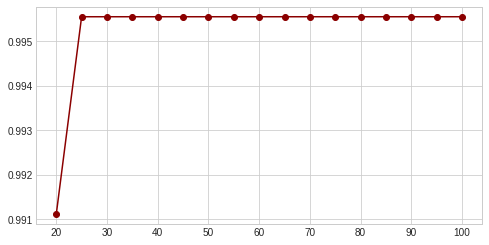

In [29]:
from sklearn.ensemble import RandomForestClassifier

results = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    model = RandomForestClassifier(trees,  random_state=0)
    model.fit(X_train, y_train)
    y_pred12 = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred12)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")






# #Create a Gaussian Classifier
# rand=RandomForestClassifier(n_estimators=20)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# rand.fit(X_train,y_train)

# y_predwithrand=rand.predict(X_test)
# y_predwithrand

In [38]:

#Create a Gaussian Classifier
rand=RandomForestClassifier(n_estimators=25)

#Train the model using the training sets y_pred=clf.predict(X_test)
rand.fit(X_train,y_train)

y_predwithrand=rand.predict(X_test)
y_predwithrand

array([3, 2, 2, 4, 1, 1, 3, 2, 0, 0, 5, 3, 2, 4, 4, 2, 4, 1, 3, 0, 5, 2,
       2, 3, 2, 4, 3, 3, 4, 5, 0, 5, 0, 3, 3, 2, 1, 4, 1, 5, 3, 4, 2, 3,
       4, 0, 0, 2, 5, 5, 3, 2, 0, 0, 2, 5, 4, 5, 4, 4, 2, 4, 2, 1, 1, 3,
       3, 4, 2, 3, 1, 5, 0, 2, 2, 2, 2, 3, 5, 0, 3, 3, 4, 0, 3, 1, 3, 0,
       5, 1, 4, 2, 3, 5, 0, 3, 1, 5, 3, 5, 0, 5, 5, 0, 3, 5, 2, 5, 5, 0,
       0, 3, 0, 4, 0, 0, 1, 2, 3, 0, 2, 4, 0, 5, 2, 2, 3, 4, 4, 2, 5, 0,
       3, 0, 1, 3, 3, 1, 4, 4, 1, 3, 5, 0, 3, 4, 0, 3, 2, 2, 3, 0, 2, 1,
       5, 2, 2, 2, 5, 3, 3, 3, 5, 5, 4, 5, 0, 0, 1, 0, 5, 0, 0, 0, 4, 0,
       5, 4, 4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 0, 3, 3, 2, 0, 1, 3, 5, 2, 2,
       2, 4, 4, 2, 1, 3, 3, 1, 2, 0, 3, 0, 3, 3, 0, 1, 1, 3, 5, 5, 5, 3,
       1, 3, 1, 3, 2])

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predwithrand))
y_predwithrand

print("Precison:",metrics.precision_score(y_test, y_predwithrand,average='weighted') )
print("recall:",metrics.recall_score(y_test, y_predwithrand,average='weighted') )
print("F1Score:",metrics.f1_score(y_test, y_predwithrand,average='weighted') )

Accuracy: 0.9866666666666667
Precison: 0.9873703703703703
recall: 0.9866666666666667
F1Score: 0.9867035126223254
